In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Filter for binary classification 'versicolor' vs 'virginica' ['setosa' 'versicolor' 'virginica']
X = iris_df[iris_df['species'].isin([1, 2])].copy()

# Relabel the target column (optional: make species binary 0 and 1)
X['species'] = X['species'].map({1: 0, 2: 1})

#to array
X = X.values

# Print the filtered dataset
X.shape # (100, 5)


(100, 5)

In [3]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train = X_train[:, -1].reshape(-1, 1)
y_test = X_test[:, -1].reshape(-1, 1)
X_train = X_train[:, :-1]
X_test = X_test[:, :-1]

print(X_train.shape) # (80, 5) m examples, n features
print(X_test.shape)  # (20, 5)
print(y_train.shape) # (80,1)
print(y_test.shape)  # (20,1)

X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

(80, 4)
(20, 4)
(80, 1)
(20, 1)


In [ ]:
#Logistic Regression
import sys
import os
sys.path.append(os.path.abspath(".."))
from models.logisticregression import LogisticRegression
from models.gradient_check import gradient_check

lr_model = LogisticRegression(n_inputs=X_train.shape[0], lambd_reg=0.01)
lr_model.fit(X_train, y_train, learning_rate=0.01, n_iters=10000)
predictions = lr_model.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')

Cost after iteration 0: 4.464423400572354
Cost after iteration 100: 0.5677639597116839
Cost after iteration 200: 0.5372020782531204
Cost after iteration 300: 0.5097677684246726
Cost after iteration 400: 0.4850760988438422
Cost after iteration 500: 0.46278836422610536
Cost after iteration 600: 0.44260887662494613
Cost after iteration 700: 0.4242808292625258
Cost after iteration 800: 0.4075818609934721
Cost after iteration 900: 0.3923197094660257
Cost after iteration 1000: 0.37832816889600884
Cost after iteration 1100: 0.3654634537674616
Cost after iteration 1200: 0.35360099843395953
Cost after iteration 1300: 0.34263268132062524
Cost after iteration 1400: 0.3324644408436957
Cost after iteration 1500: 0.3230142408227515
Cost after iteration 1600: 0.31421034102645845
Cost after iteration 1700: 0.30598983031841304
Cost after iteration 1800: 0.2982973836436536
Cost after iteration 1900: 0.291084208623191
Cost after iteration 2000: 0.2843071521282195
Cost after iteration 2100: 0.277927941533

Cost after iteration 0: 0.7129529001752754
Cost after iteration 100: 0.6927150044561934
Cost after iteration 200: 0.6905521946740466
Cost after iteration 300: 0.6894835238624449
Cost after iteration 400: 0.6866371017383522
Cost after iteration 500: 0.6717392548704852
Cost after iteration 600: 0.6540682378193201
Cost after iteration 700: 0.6362657727696067


Cost after iteration 800: 0.6141807335342822
Cost after iteration 900: 0.5871101820493443
Cost after iteration 1000: 0.5552461352655118
Cost after iteration 1100: 0.5196017571571093
Cost after iteration 1200: 0.48179214931637854
Cost after iteration 1300: 0.44362890655714887
Cost after iteration 1400: 0.406709133725077
Cost after iteration 1500: 0.3721694966788397
Cost after iteration 1600: 0.3406418705829779
Cost after iteration 1700: 0.3123418312496317
Cost after iteration 1800: 0.28720200433301574
Cost after iteration 1900: 0.2649935924334108
Cost after iteration 2000: 0.24541501724475312
Cost after iteration 2100: 0.2281477862232259
Cost after iteration 2200: 0.21288749876088509
Cost after iteration 2300: 0.1993585385160384
Cost after iteration 2400: 0.18731909212387718
Cost after iteration 2500: 0.17656093815917173
Cost after iteration 2600: 0.16690672022104314
Cost after iteration 2700: 0.15820624922980767
Cost after iteration 2800: 0.15033265582786137
Cost after iteration 2900: 

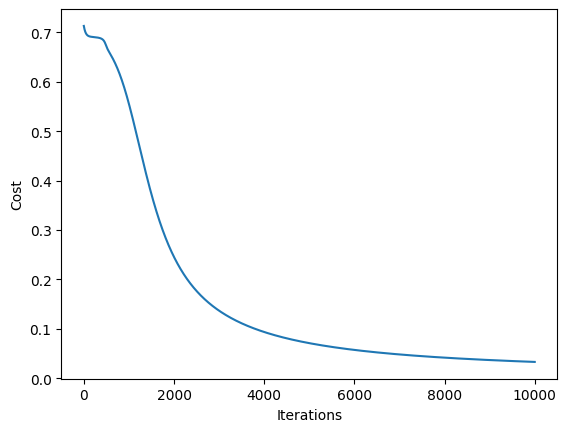

In [5]:
from models.fnn_classifier import FNN1Layer
# Train the model
fnn1_model = FNN1Layer(input_dim=X_train.shape[0], output_dim=1, nunits=4, lambd_reg=0.001, dropout=None)
parameters, costs = fnn1_model.fit(X_train, y_train, learning_rate=0.01, n_iters=10000)
predictions = fnn1_model.predict(X_test)

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')

Backward propagation works well! Difference = 2.8614938876683526e-08
Cost after epoch 0: 0.6931471839155027
Cost after epoch 100: 0.1595722234390379
Cost after epoch 200: 0.052260379922307997
Cost after epoch 300: 0.03228730021677556
Cost after epoch 400: 0.024039920514713393
Cost after epoch 500: 0.019523394605514513
Cost after epoch 600: 0.016613580917305238
Cost after epoch 700: 0.0145236951895482
Cost after epoch 800: 0.01290278402806301
Cost after epoch 900: 0.011576329932955185
Cost after epoch 1000: 0.010450152506071038
Cost after epoch 1100: 0.009469869061252266
Cost after epoch 1200: 0.008602516704722814
Cost after epoch 1300: 0.007828220848014177
Cost after epoch 1400: 0.007134052584750492
Cost after epoch 1500: 0.006511015779088519
Cost after epoch 1600: 0.005952255163595869
Cost after epoch 1700: 0.005452103552451471
Cost after epoch 1800: 0.0050055158224580005
Cost after epoch 1900: 0.004607809954043839
Cost after epoch 2000: 0.0042545117526527195
Cost after epoch 2100: 0.

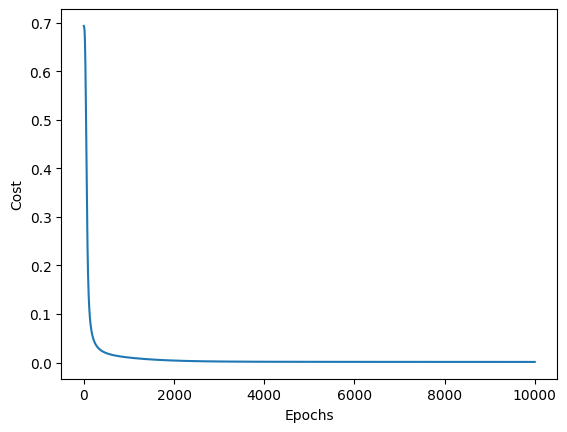

In [9]:
from models.fnn_classifier import FNNClassifier

fnn_model = FNNClassifier(X_train.shape[0], 1, [2], ["relu"], lamdb_reg=0.001)
fnn_model.initialize_parameters()
gradient_check(fnn_model, X_train, y_train, epsilon=1e-7)
parameters, costs = fnn_model.fit_mini_batch(X_train, y_train, optimizer="adam", learning_rate=0.01, num_epochs=10000, batch_size=128)
predictions = fnn_model.predict(X_test)

plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')